# Tarea 1
## Reconocimiento de Patrones en Minería de Datos

### Introducción
presente informe presenta el desarrollo y los resultados del análisis de Clustering sobre un dataset de Reviews de cervezas. Para esto se debió procesar previamente los datos para un manejo óptimo sobre las gráficas y los algoritmos en sí.

### Librerías

In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import sklearn
import random

In [2]:
np.set_printoptions(threshold=np.nan)

### Lectura de los Datos

In [3]:
import pandas as pd
data = pd.read_csv('beer_reviews.csv', sep =',', header = 0)

In [63]:
data

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883
5,1075,Caldera Brewing Company,1325524659,3.0,3.5,3.5,oline73,Herbed / Spiced Beer,3.0,3.5,Caldera Ginger Beer,4.7,52159
6,1075,Caldera Brewing Company,1318991115,3.5,3.5,3.5,Reidrover,Herbed / Spiced Beer,4.0,4.0,Caldera Ginger Beer,4.7,52159
7,1075,Caldera Brewing Company,1306276018,3.0,2.5,3.5,alpinebryant,Herbed / Spiced Beer,2.0,3.5,Caldera Ginger Beer,4.7,52159
8,1075,Caldera Brewing Company,1290454503,4.0,3.0,3.5,LordAdmNelson,Herbed / Spiced Beer,3.5,4.0,Caldera Ginger Beer,4.7,52159
9,1075,Caldera Brewing Company,1285632924,4.5,3.5,5.0,augustgarage,Herbed / Spiced Beer,4.0,4.0,Caldera Ginger Beer,4.7,52159


In [5]:
print (data.brewery_name.unique().shape)
print (data.beer_style.unique().shape)

(5743,)
(104,)


### Selección de Datos

In [4]:
data_matrix = pd.read_csv('beer_reviews.csv', sep =',', header = 0, usecols=['brewery_name','beer_style','review_overall',
                                                                             'review_aroma', 'review_appearance', 
                                                                             'review_palate', 'review_taste']).as_matrix()


In [5]:
data_matrix[1]

array(['Vecchio Birraio', 3.0, 2.5, 3.0, 'English Strong Ale', 3.0, 3.0], dtype=object)

### Muestreo

In [6]:
K_Muestra =10000

random.seed(40)
Muestra=[]
cnt=0
Usados= set()
while(cnt<K_Muestra):
    pos=random.randint(0, len(Muestra))
    if(pos not in Usados):
        Muestra.append(data_matrix[pos])
        Usados.add(pos)
        cnt+=1
data_matrix_util =[]
etiquetas = []
fabrica = []
tipo = []
for cerveza in Muestra:
    data_matrix_util.append([cerveza[1],cerveza[2],cerveza[3],cerveza[5],cerveza[6]])
    etiquetas.append([cerveza[0],cerveza[4]])
    tipo.append(cerveza[4])
    fabrica.append(cerveza[0])
    

In [7]:
etiquetas

[['Vecchio Birraio', 'Hefeweizen'],
 ['Vecchio Birraio', 'English Strong Ale'],
 ['Vecchio Birraio', 'Foreign / Export Stout'],
 ['Vecchio Birraio', 'German Pilsener'],
 ['Caldera Brewing Company', 'American Double / Imperial IPA'],
 ['Caldera Brewing Company', 'Herbed / Spiced Beer'],
 ['Caldera Brewing Company', 'Herbed / Spiced Beer'],
 ['Caldera Brewing Company', 'Herbed / Spiced Beer'],
 ['Caldera Brewing Company', 'Herbed / Spiced Beer'],
 ['Caldera Brewing Company', 'Herbed / Spiced Beer'],
 ['Amstel Brouwerij B. V.', 'Light Lager'],
 ['Caldera Brewing Company', 'Herbed / Spiced Beer'],
 ['Caldera Brewing Company', 'Herbed / Spiced Beer'],
 ['Caldera Brewing Company', 'Herbed / Spiced Beer'],
 ['Caldera Brewing Company', 'Herbed / Spiced Beer'],
 ['Caldera Brewing Company', 'Oatmeal Stout'],
 ['Caldera Brewing Company', 'Oatmeal Stout'],
 ['Caldera Brewing Company', 'American Pale Lager'],
 ['Amstel Brouwerij B. V.', 'Light Lager'],
 ['Caldera Brewing Company', 'Rauchbier'],
 ['

### Descripción de los datos

El dataset "beer_reviews.csv" tiene 1586614 registros y 13 columnas, de las cuales sólo se utilizarán las siguientes:
* Nombre Cerveceria
* Tipo de cerveza
* Nota general (overall)
* Nota de aroma
* Nota de apariencia
* Nota de gusto (palate)
* Nota de sabor 

### Listas Indexadas 
Para el proceso de reobtención de los datos se debe buscar una forma de mantener la información ordenada. Para esto se generará una lista codificada de valores, es decir, a cada cerveceria se le asignará un número, luego se generará una lista de cada cerveza con su cervecería, esto ocurrirá de la misma forma para los tipos de cerveza:

Lista_tipos = [tipo_3, tipo_2, tipo_1, tipo_1, tipo_4, tipo_2].

lista_tipos_indexada = [3, 2, 1, 1, 4, 2]

In [7]:
set_tipos= set(tipo)
lista_tipos= []
for cerveza in set_tipos:
    lista_tipos.append(cerveza)

lista_tipos_indexada= []
for cerveza in tipo:
    lista_tipos_indexada.append(lista_tipos.index(cerveza))


    
set_fabricas= set(fabrica)
lista_fabricas= []
for cerveza in set_fabricas:
    lista_fabricas.append(cerveza)

lista_fabricas_indexada= []
for cerveza in fabrica:
    lista_fabricas_indexada.append(lista_fabricas.index(cerveza))


### Disminución de dimensionalidad
Al seleccionar 5 columnas, se dice que se tienen 5 dimensiones para cada entrada, por lo que debido a la llamada *curse of dimensionality* se complica demasiado el cálculo. Para poder solucionar esto, se debe disminuir la dimensionalidad de los datos. 
Para disminuir las dimensiones se pueden realizar diversos métodos, y para este caso se utilizará la reducción por PCA.
#### Principal Component Analysis (PCA).
Este método reduce la dimensionalidad de los datos a través del cálculo de la proyección de estos sobre una dimensionalidad menor. Para el cálculo de la proyección PCA utiliza el cálculo de <i> Single Value Decomposition </i> o SVD, el cual descompone la matriz a reducir en matrices de vectores y valores regidos por los <i> EigenValues </i> o Autovalores, los que representan caracteristicas de la matriz.

In [8]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [9]:
data_scaled = StandardScaler().fit_transform(data_matrix_util)
pca = PCA(n_components = 2)
pca.fit(data_scaled)
data_trans = pca.transform(data_scaled)

In [10]:
colormap = np.array(['b','r','g','y','c', 'm','k','#345678', '#B43114',
                     '#A17CB7','#7CB7B3','#7A4E19','#767A19','#1F3C27',
                     '#5F5784','#B4149E','#146DB4','#28B414'])
X_m = []
Y_m = []
for i in range(len(data_trans)):
    X_m.append(data_trans[i,0])
    Y_m.append(data_trans[i,1])
data_final = data_trans

## Algoritmos de Clustering
### K-Means
El proceso de Clustering llamado K-Means es el cual donde se ubica una cantidad de centroides ya conocidos, entre iteración e iteración estos se van reposicionando y adaptando el espacio que estos abarcan. Este proceso es útil cuando la muestra posee un comportamiento cercano a grupos con forma circular, debido a la idea de aglomeramiento de datos.

In [11]:
from sklearn.cluster import KMeans

In [12]:
k_means = KMeans(init="k-means++", n_clusters=4, n_init=5)
k_means.fit(data_final)
kmlabels = k_means.labels_
kmcluster = k_means.cluster_centers_


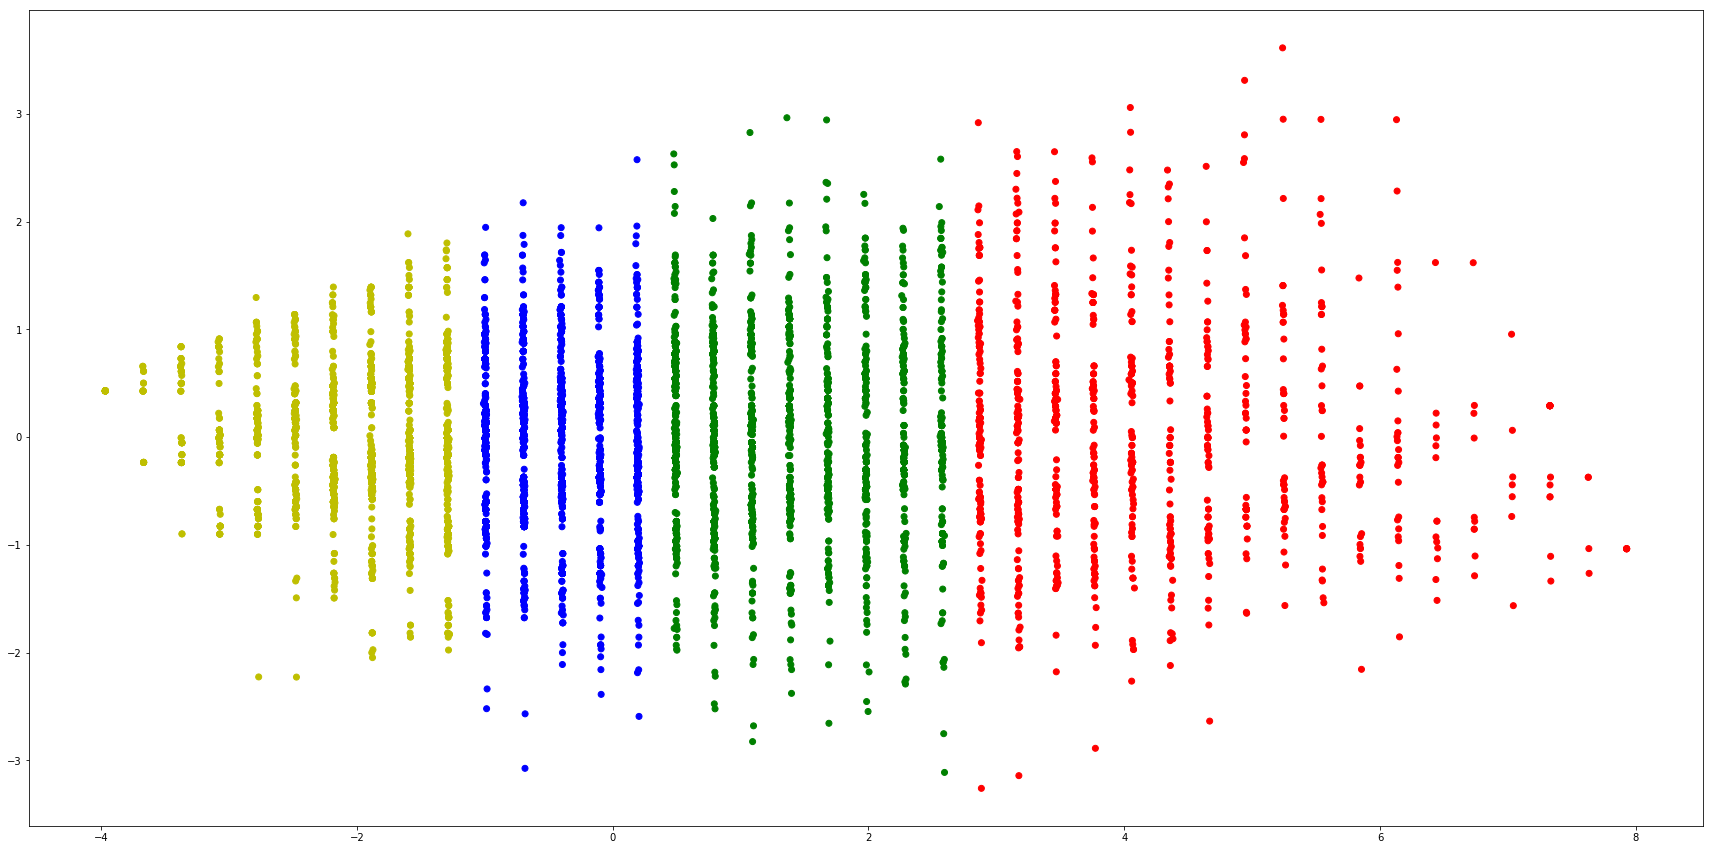

In [13]:
plt.figure(figsize=(30,15))
plot = plt.scatter(X_m,Y_m,c= colormap[kmlabels] )

plt.show()



Se generará un segundo gráfico con k_means con 8 clusters, para comparar la utilidad de estos.

In [14]:
k_means_2 = KMeans(init="k-means++", n_clusters=8, n_init=5)
k_means_2.fit(data_final)
kmlabels_2 = k_means_2.labels_
kmcluster_2 = k_means_2.cluster_centers_


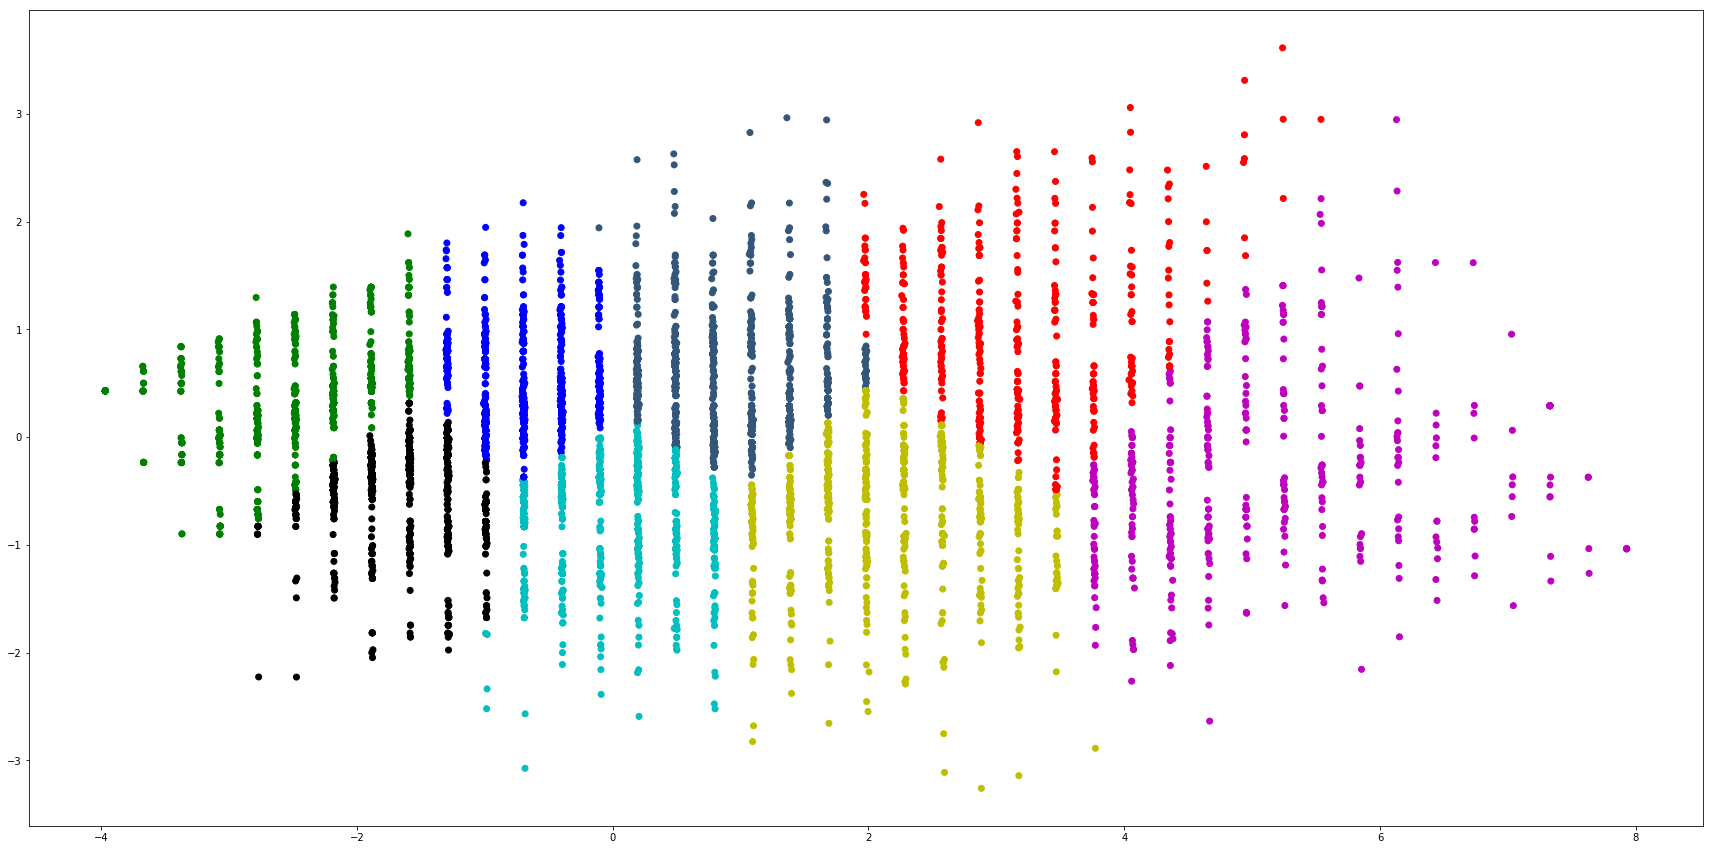

In [15]:
plt.figure(figsize=(30,15))
plot = plt.scatter(X_m,Y_m,c= colormap[kmlabels_2] )

plt.show()



Se puede apreciar que con una cantidad mayor de clusters, el resultado empeora, puesto que se puede observar que estos empiezan a dividir los grupos que a la vista se pueden apreciar como un cluster en si, por lo que la selección de 4 clusters es la óptima.
Si bien 4 clusters no divide de la forma que visualmente se esperaria, se puede apreciar que sigue demostrando cierta tendencia util para el analisis de datos.

### MiniBatch K-Means
A diferencia de K-Means, MiniBatch no trabaja directamente con todos los datos, sino que utiliza una muestra inicial a la que le aplica el algoritmo de clustering. Luedo de la primera iteración agrega más datos a la muestra y corre de nuevo el algoritmo, de modo que va redistribuyendo entre los centroides ya posicionados, generando pequeños cambios.

In [16]:
from sklearn.cluster import MiniBatchKMeans

In [17]:
MBk_means = MiniBatchKMeans(init="k-means++", n_clusters=4, batch_size=100)
MBk_means.fit(data_final)
MBklabels = MBk_means.labels_

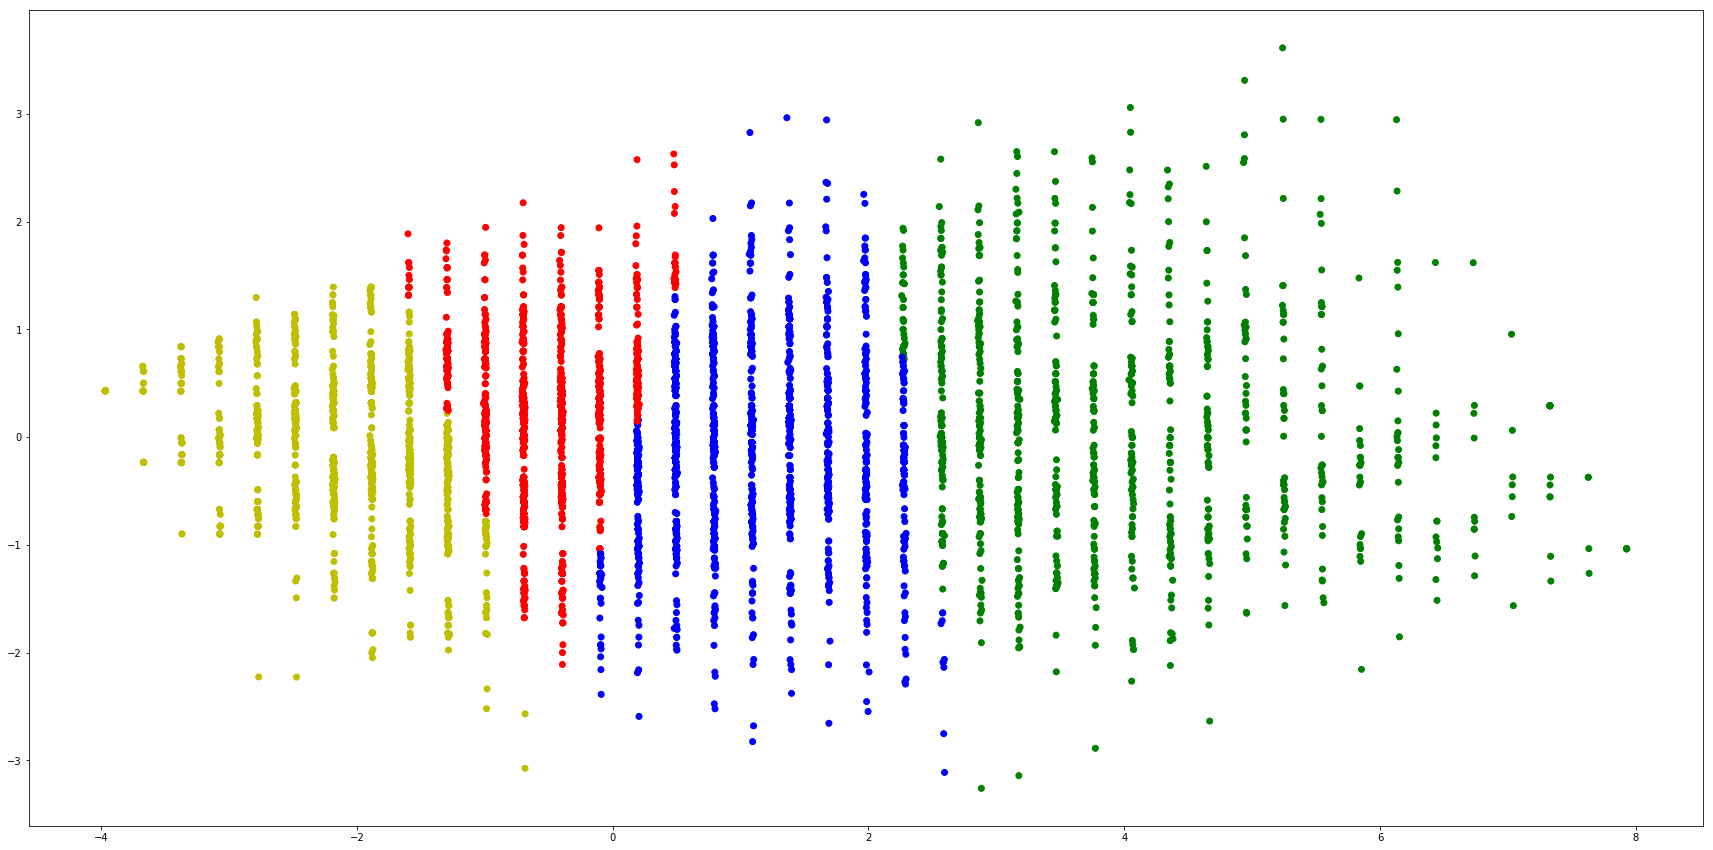

In [18]:
plt.figure(figsize=(30,15))
plot = plt.scatter(X_m,Y_m,c= colormap[MBklabels] )

plt.show()

Se puede ver que aún con 4 colores la división de franjas no se ve gravemente afectada por clusters anormales. Para confirmar la funcionalidad de poseer solo 4 cluster se evaluará el efecto sobre los datos al dividir en una mayor cantidad.

In [19]:
MBk_means_2 = MiniBatchKMeans(init="k-means++", n_clusters=8, batch_size=100)
MBk_means_2.fit(data_final)
MBklabels_2 = MBk_means_2.labels_

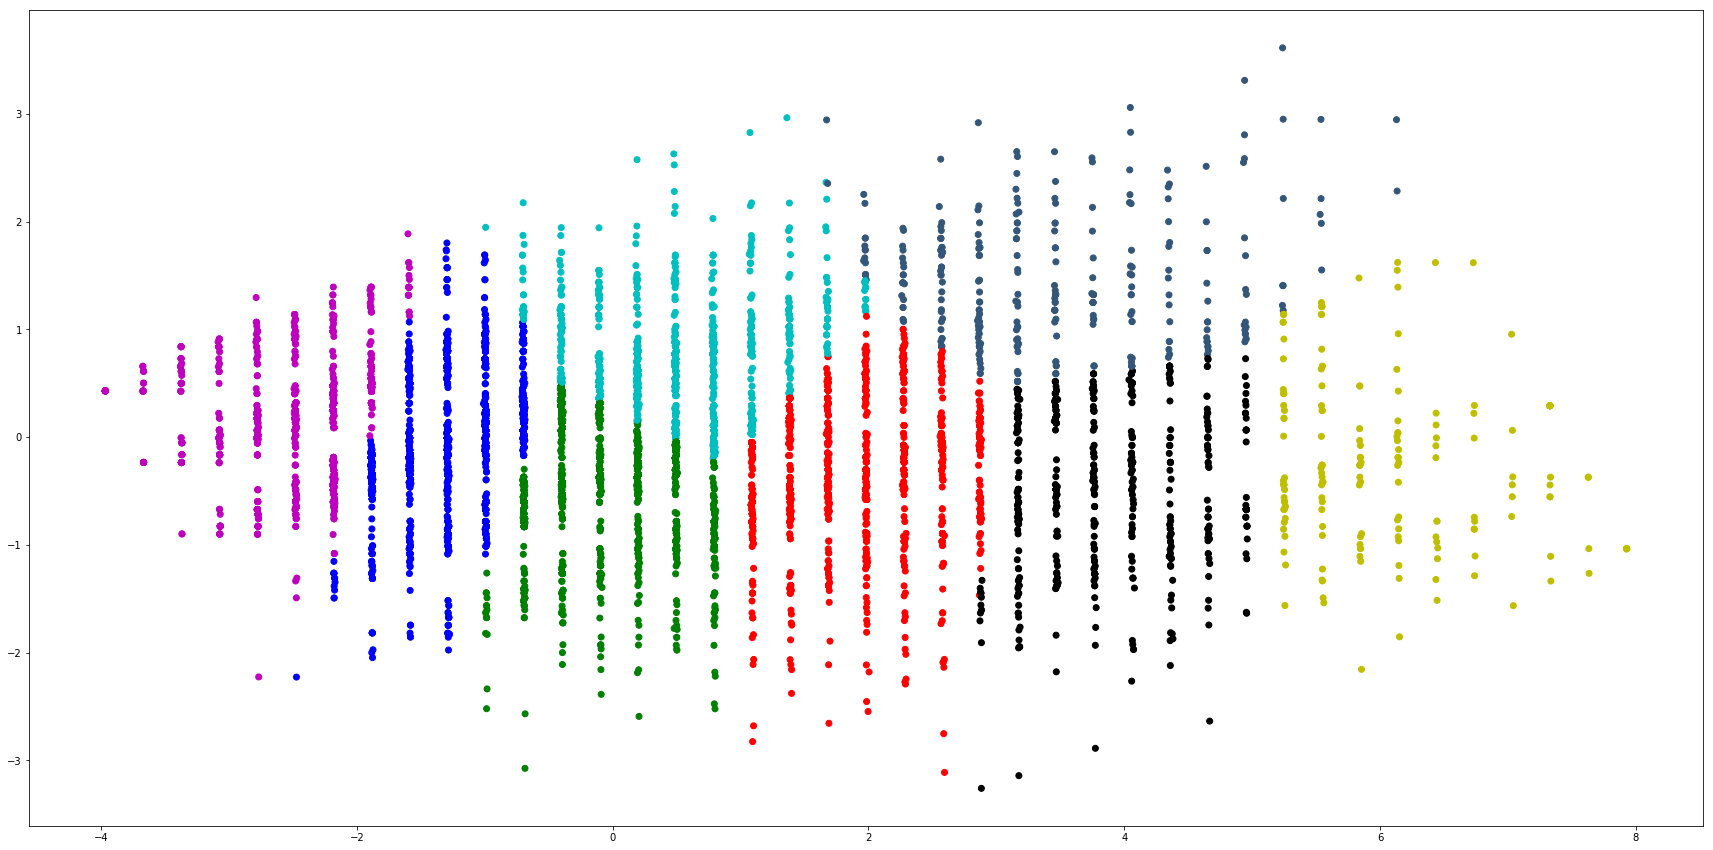

In [20]:
plt.figure(figsize=(30,15))
plot = plt.scatter(X_m,Y_m,c= colormap[MBklabels_2] )

plt.show()

Se observa que al igual que en el caso anterior, una mayor cantidad de clusters no divide de la manera en que están distribuidos los datos, por lo que manejar una mayor cantidad no entrega mayor información de la buscada.

### HAC Completo
Hierarchical Aglomerative Clustering o HAC, trabaja de forma iterativa, iniciando de la premisa de que todos los puntos son un cluster, para luego unir (según en metodo utilizado) clusters de dos en dos. En cada paso se unen los clusters más cercanos, ya sea por una media de distancias, la mayor distancia, o la menor distancia. 

En especifico, HAC-Completo une por el criterio de mayor distancia, esto es, considerar los puntos más lejanos entre dos clusters, para luego unir el par de cluster con el que se genere el valor más pequeño.

Este proceso genera un solo gran cluster, por lo que para obtener cierta cantidad especifica de clusters se deben romper la cantidad de enlaces desde el ultimo generado hacia el primero, hasta conseguir la cantidad de clusters buscados.

In [21]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster

In [22]:
HAC_clustering = linkage(data_final,'complete')

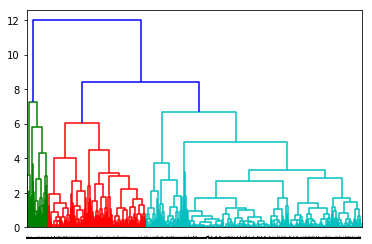

In [23]:
dendrogram(HAC_clustering,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=1.,  # font size for the x axis labels
)
plt.figure(figsize=(30,15))
plt.show()

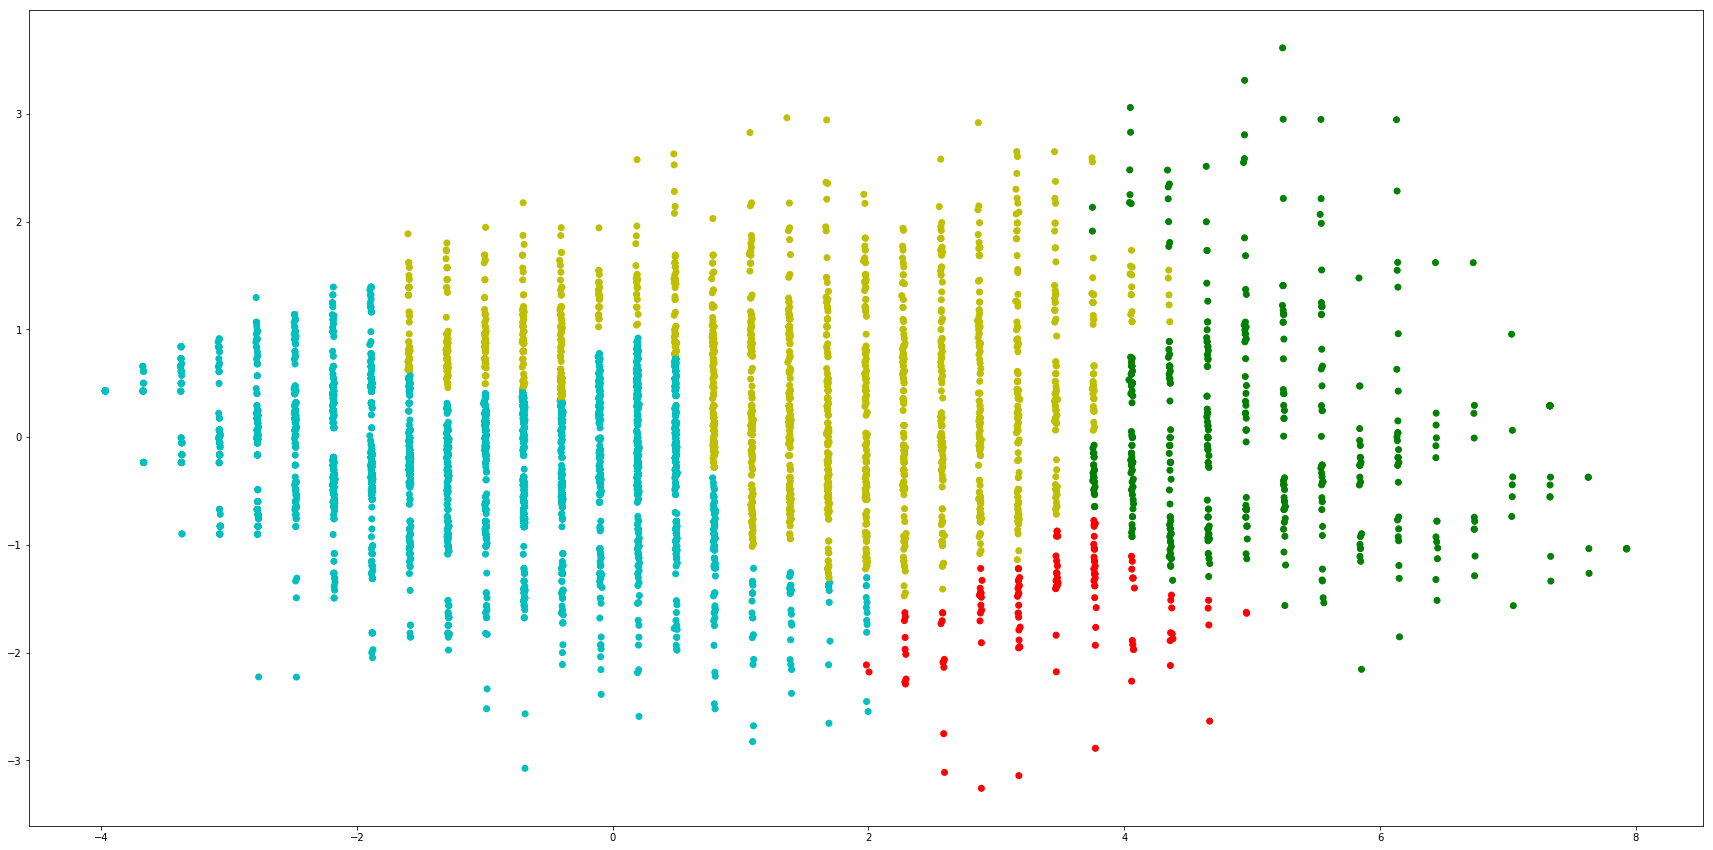

In [24]:
clabels = fcluster(HAC_clustering, 4, criterion='maxclust')
plt.figure(figsize=(30,15))
plt.scatter(X_m,Y_m,c=colormap[clabels])
plt.show()

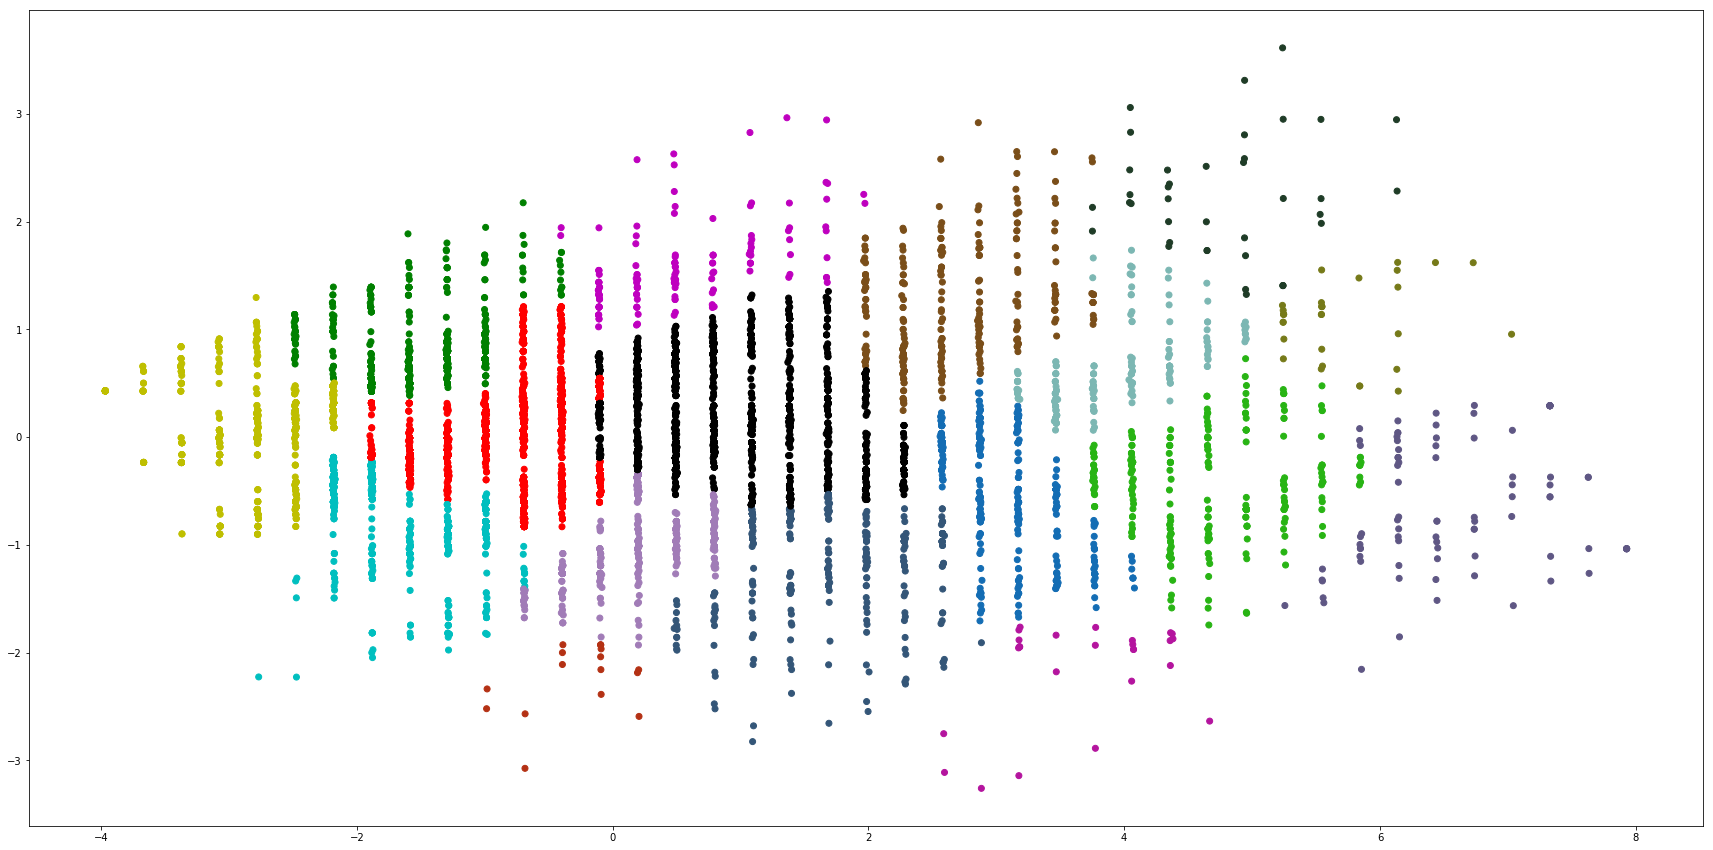

In [25]:
clabels = fcluster(HAC_clustering, 17, criterion='maxclust')
plt.figure(figsize=(30,15))
plt.scatter(X_m,Y_m,c=colormap[clabels])
plt.show()

Luego de comparar entre 4 y 17 clusters, se puede ver que si bien con una mayor cantidad de clusters los grupos están más divididos, ninguno de los dos graficos muestra una real relacion entre sus variables, por lo que este metodo de clustering no es viable para este dataset.

### HAC Ward


HAC Ward es otro proceso de clustering aglomerativo, pero a diferencia del presentado anteriormente, este algoritmo une dos clusters segun la relación de la diferencia entre errores cuadraticos entre clusters.

In [25]:
HACW_clustering = linkage(data_final,'ward')

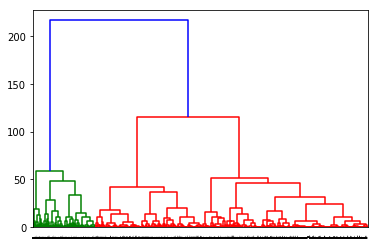

In [26]:
dendrogram(HACW_clustering,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=1.,  # font size for the x axis labels
)
plt.figure(figsize=(25,10))
plt.show()

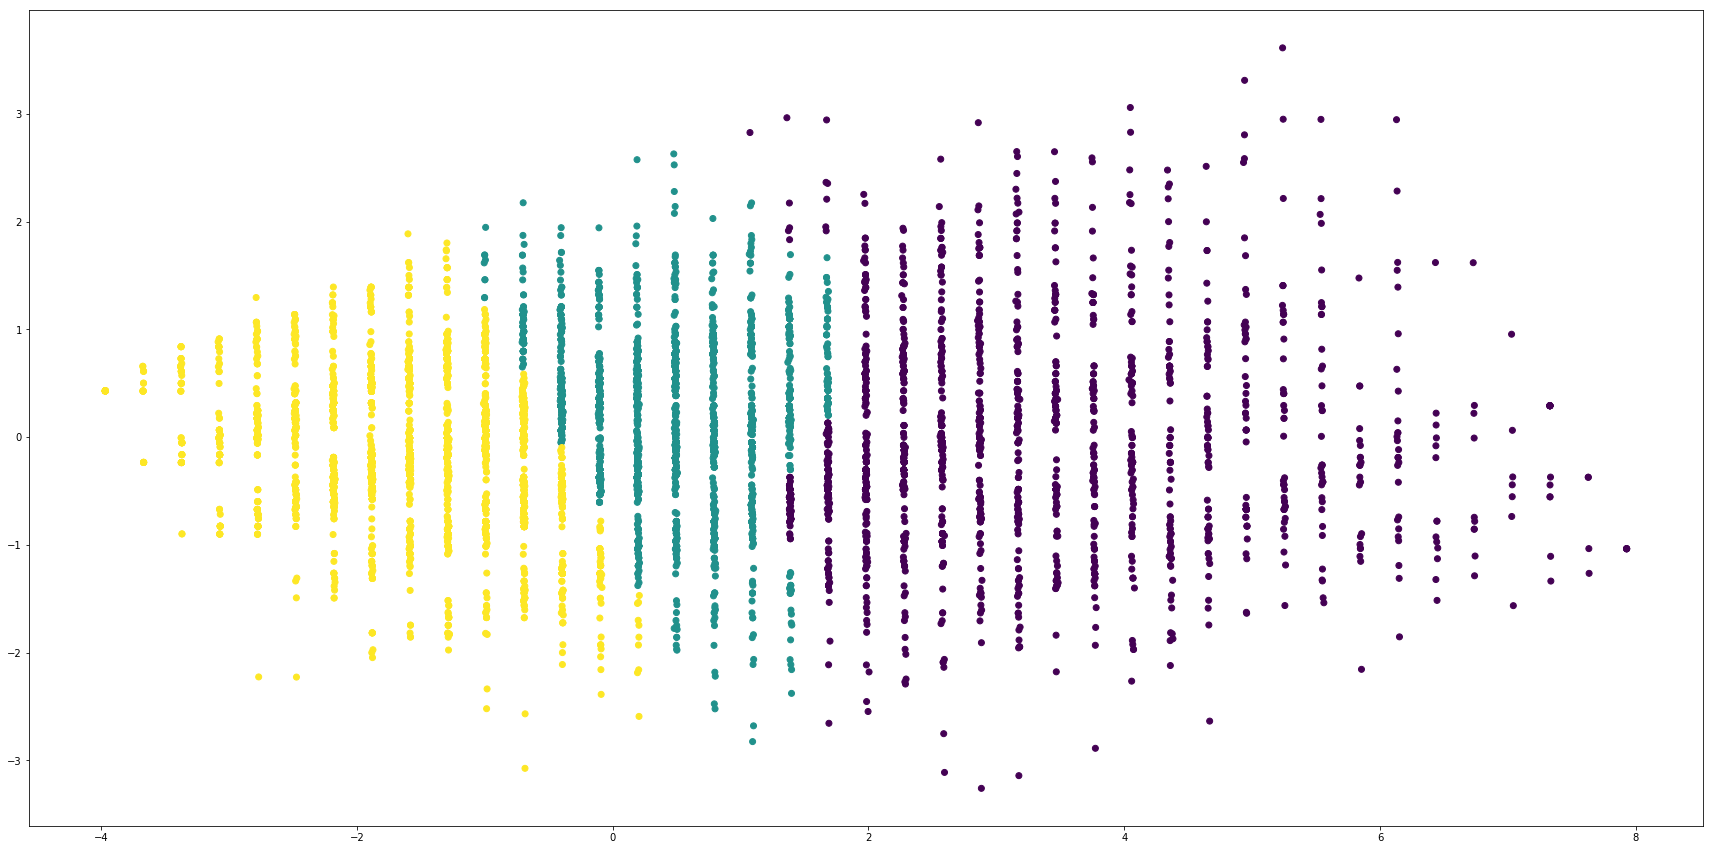

In [27]:
wlabels = fcluster(HACW_clustering, 3, criterion='maxclust')
plt.figure(figsize=(30,15))
plt.scatter(X_m,Y_m,c=wlabels)
plt.show()

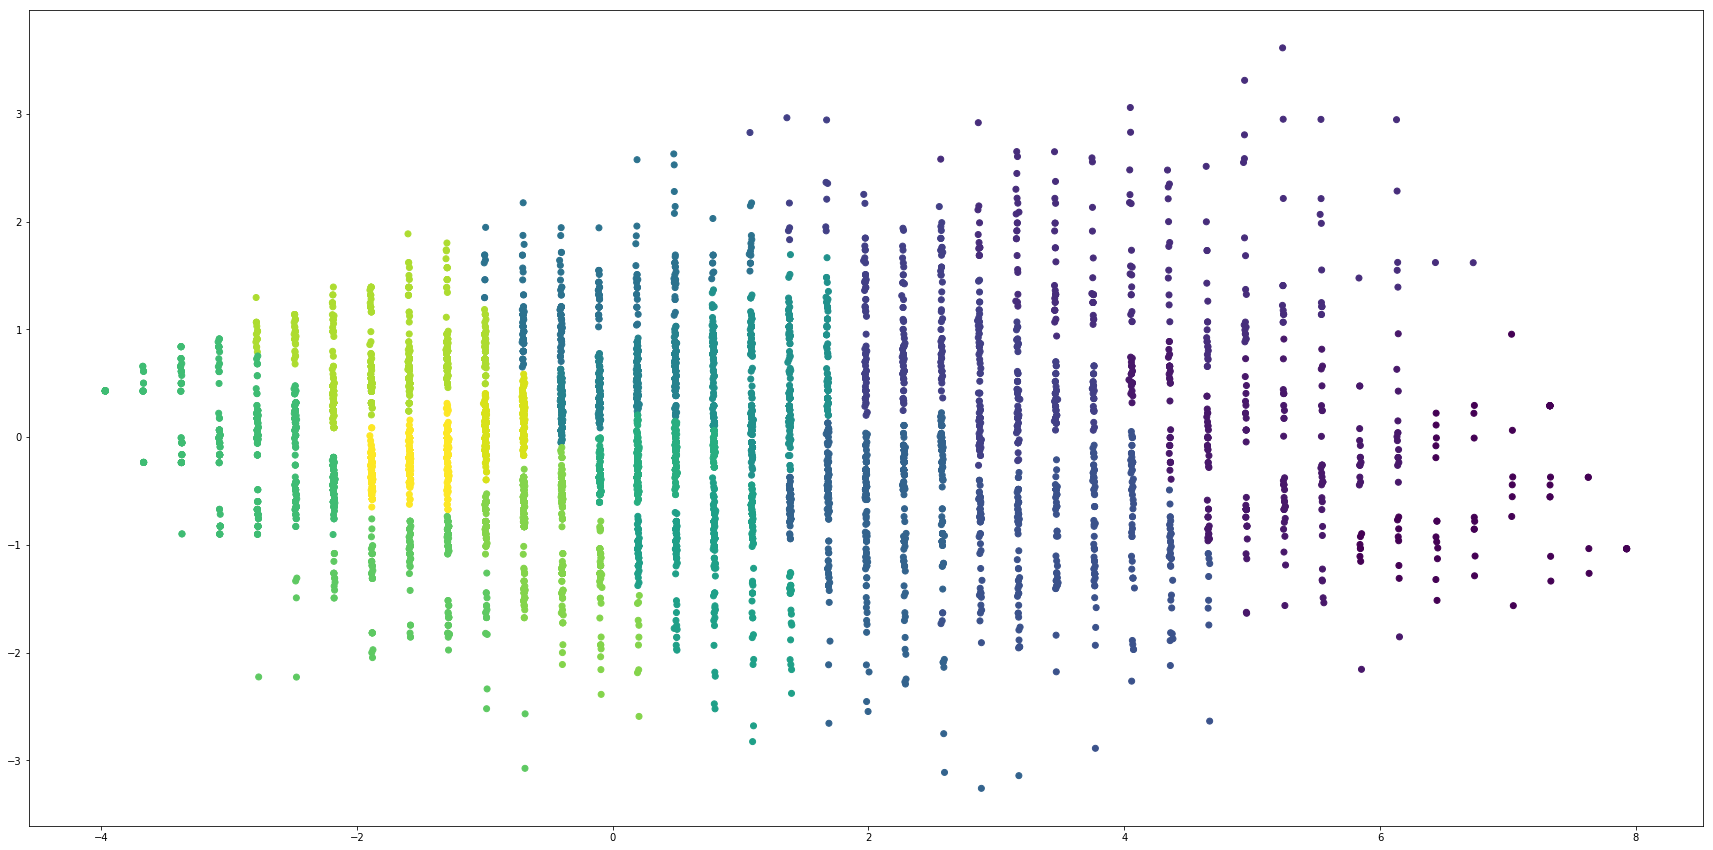

In [28]:
wlabels_2 = fcluster(HACW_clustering, 17, criterion='maxclust')
plt.figure(figsize=(30,15))
plt.scatter(X_m,Y_m,c=wlabels_2)
plt.show()

Al igual que el proceso anterior, se observa que entre 3 y 17 clusters pedidos la división entre ellos no entrega más información de la que se tiene, por lo que tampoco es un buen metodo de clustering para este dataset.

### DBSCAN
El proceso que utiliza DBScan se basa en la densidad de datos que se presenta, para esto, el algoritmo evalua en cada punto la cantidad de otros puntos que se encuentren en un rango de radio <i>eps</i>, si 2 puntos se encuentran dentro del radio asignado, estos se consideran del mismo cluster. Por otra parte, cada cluster posee dos categorias de datos, los core-points y los outliers. Para que un punto se considere core, necesita poseer cierta cantidad de otros datos del mismo cluster dentro de su radio definido, este valor de settea a través de <i>min_samples</i>, que un punto se considere core significa que este es un dato seguro que representa la distribución, mientras que un outlier se considera más ambiguo.

In [29]:
from sklearn.cluster import DBSCAN
from sklearn import datasets

In [30]:
DBSCAN_cluster = DBSCAN(eps=0.185, min_samples = 8)
DBSCAN_cluster.fit(data_final)
DBlabels = DBSCAN_cluster.labels_
cores = DBSCAN_cluster.core_sample_indices_

C:\Anaconda2\envs\py36\lib\site-packages\matplotlib\lines.py:1206: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self._markerfacecolor != fc:


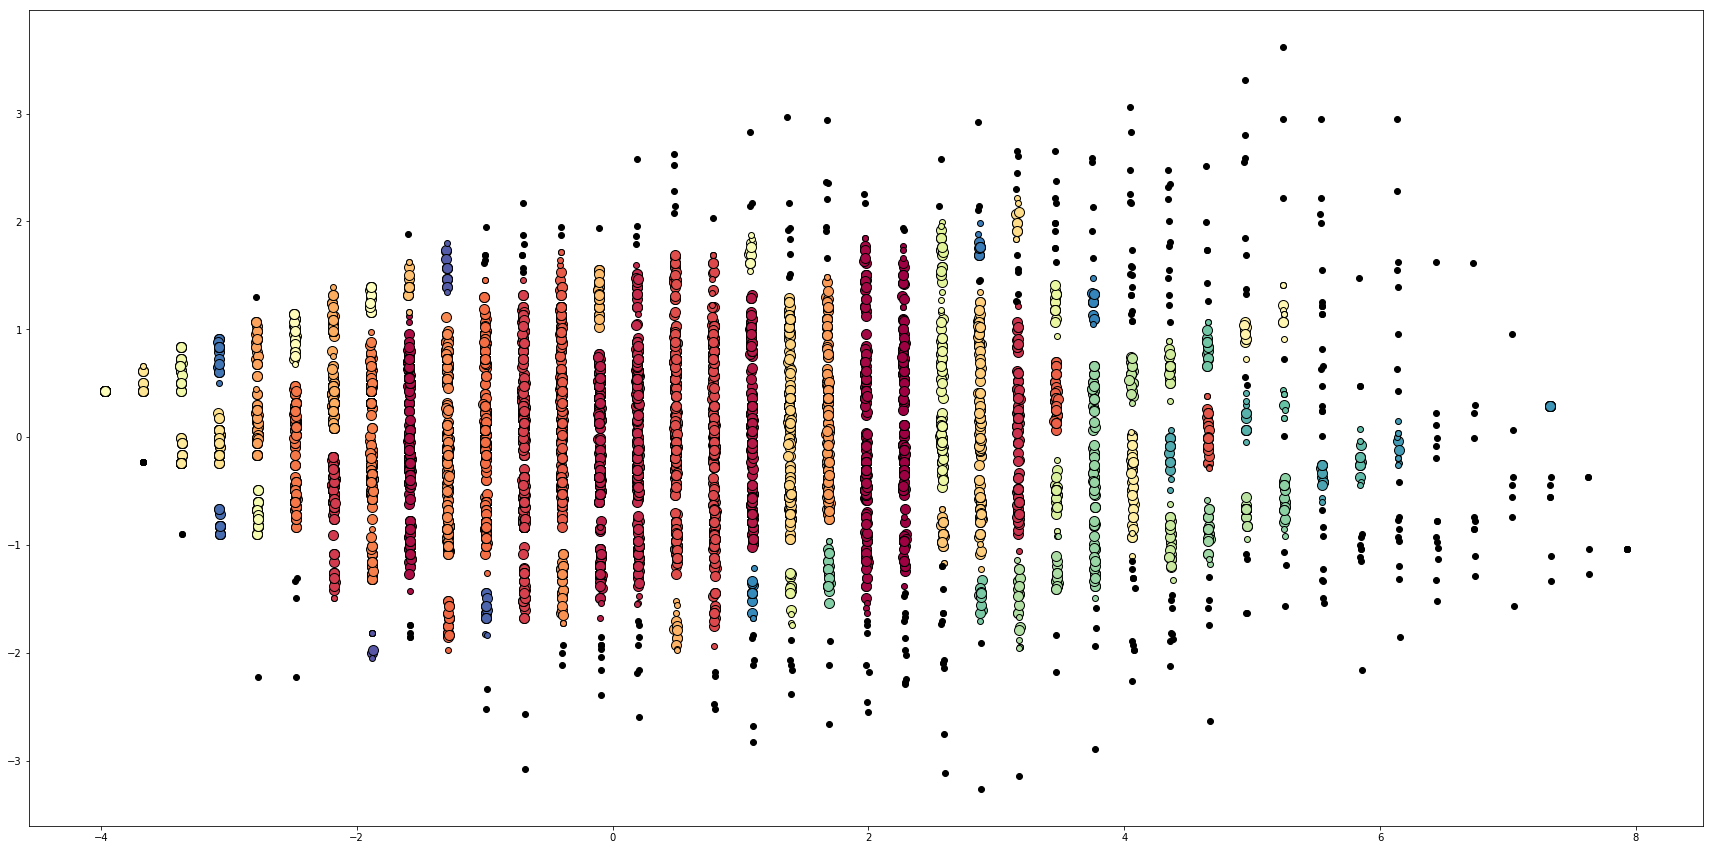

In [31]:
cs_mask = np.zeros_like(DBSCAN_cluster.labels_, dtype = bool)
cs_mask[DBSCAN_cluster.core_sample_indices_] = True

Ulabels = set(DBlabels)
plt.figure(figsize=(30,15))
colors = plt.cm.Spectral(np.linspace(0, 1, len(Ulabels)))
for k, col in zip(Ulabels, colors):
    if k == -1:
        col = 'k'
    cm_label = (DBlabels == k)
    xy = data_final[cm_label & cs_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=10)
    xy = data_final[cm_label & ~cs_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6)

plt.show()

Se puede observar que DBScan logra detectar de mejor manera la distribución de los datos, esto es debido a que luego de ensayo y error se pudo obtener valores utiles para ambas variables. Un dato se consideró útil de manera tentativa si es que los grupos generados demuestran ciertos patrones correctos frente a la división visual que se pueda obtener.

## Evaluación de resultados.
Para evaluar los resultados obtenidos, es necesario realizar una comparación entre la clasificación que posee cada cerveza, versus el cluster en el que quedó en cada Algoritmo.

Se considerará el mejor algoritmo el cual presente una mayor relación entre cluster y clasificación, para esto se debe definir algun tipo de medición estadistica.

A continuación se utilizan algunas métricas de clustering dentro del paquete *metrics* de *sklearn*. A partir de una visión general de estas métricas se evaluará el mejor algoritmo.

### Tipo de cerveza

In [37]:
from sklearn import metrics as m

#KMeans
print ("\n K-means")
Completeness = m.completeness_score(labels_true = lista_tipos_indexada, 
                                    labels_pred = kmlabels)
Rand_Score = m.adjusted_rand_score(labels_true = lista_tipos_indexada, 
                                    labels_pred = kmlabels)
H_Score = m.homogeneity_score(labels_true = lista_tipos_indexada, 
                                    labels_pred = kmlabels)
MI_Score = m.normalized_mutual_info_score(labels_true = lista_tipos_indexada, 
                                    labels_pred = kmlabels)
V_Score = m.v_measure_score(labels_true = lista_tipos_indexada, 
                                    labels_pred = kmlabels)

print (Completeness)
print (Rand_Score)
print (H_Score)
print (MI_Score)
print (V_Score)


#Minibatch KMeans
print ("\n Minibatch K-means")
Completeness = m.completeness_score(labels_true = lista_tipos_indexada, 
                                    labels_pred = MBklabels)
Rand_Score = m.adjusted_rand_score(labels_true = lista_tipos_indexada, 
                                    labels_pred = MBklabels)
H_Score = m.homogeneity_score(labels_true = lista_tipos_indexada, 
                                    labels_pred = MBklabels)
MI_Score = m.normalized_mutual_info_score(labels_true = lista_tipos_indexada, 
                                    labels_pred = MBklabels)
V_Score = m.v_measure_score(labels_true = lista_tipos_indexada, 
                                    labels_pred = MBklabels)

print (Completeness)
print (Rand_Score)
print (H_Score)
print (MI_Score)
print (V_Score)

#HAC Completo
print("\n HAC Completo")
Completeness = m.completeness_score(labels_true = lista_tipos_indexada, 
                                    labels_pred = clabels)
Rand_Score = m.adjusted_rand_score(labels_true = lista_tipos_indexada, 
                                    labels_pred = clabels)
H_Score = m.homogeneity_score(labels_true = lista_tipos_indexada, 
                                    labels_pred = clabels)
MI_Score = m.normalized_mutual_info_score(labels_true = lista_tipos_indexada, 
                                    labels_pred = clabels)
V_Score = m.v_measure_score(labels_true = lista_tipos_indexada, 
                                    labels_pred = clabels)

print (Completeness)
print (Rand_Score)
print (H_Score)
print (MI_Score)
print (V_Score)

#Ward
print("\n Ward")
Completeness = m.completeness_score(labels_true = lista_tipos_indexada, 
                                    labels_pred = wlabels)
Rand_Score = m.adjusted_rand_score(labels_true = lista_tipos_indexada, 
                                    labels_pred = wlabels)
H_Score = m.homogeneity_score(labels_true = lista_tipos_indexada, 
                                    labels_pred = wlabels)
MI_Score = m.normalized_mutual_info_score(labels_true = lista_tipos_indexada, 
                                    labels_pred = wlabels)
V_Score = m.v_measure_score(labels_true = lista_tipos_indexada, 
                                    labels_pred = wlabels)

print (Completeness)
print (Rand_Score)
print (H_Score)
print (MI_Score)
print (V_Score)

#HAC Completo
print("\n DBSCAN")
Completeness = m.completeness_score(labels_true = lista_tipos_indexada, 
                                    labels_pred = DBlabels)
Rand_Score = m.adjusted_rand_score(labels_true = lista_tipos_indexada, 
                                    labels_pred = DBlabels)
H_Score = m.homogeneity_score(labels_true = lista_tipos_indexada, 
                                    labels_pred = DBlabels)
MI_Score = m.normalized_mutual_info_score(labels_true = lista_tipos_indexada, 
                                    labels_pred = DBlabels)
V_Score = m.v_measure_score(labels_true = lista_tipos_indexada, 
                                    labels_pred = DBlabels)

print (Completeness)
print (Rand_Score)
print (H_Score)
print (MI_Score)
print (V_Score)




 K-means
0.184719199953
0.0645730787613
0.0682213657234
0.112257721766
0.0996423492802

 Minibatch K-means
0.181293106669
0.0650837063668
0.0682214901844
0.111211896383
0.09913717316

 HAC Completo
0.163775141546
0.0322876791297
0.03944134071
0.0803710840885
0.0635727091212

 Ward
0.195388784257
0.0633941818152
0.0567152738962
0.105268838767
0.0879123366483

 DBSCAN
0.128009580815
0.0266914882916
0.123360929296
0.125663761077
0.125642270775


Se eligieron cinco métricas: Completeness, Adjusted Rand Score, Homogeneity Score, Normalized Mutual Info Score y V Measure Score. En general, si se considera un promedio de todos los scores para cada uno de los algoritmos, el mejor algoritmo será DBSCAN. 
Observando las métricas por separado, *Completeness* es la mejor métrica de todas, pero aún así es muy pequeña, lo que significa que los clusters no representan correctamente la agrupación por tipo de cerveza.

### Nombre de cervecería

In [38]:
#KMeans
print ("\n K-means")
Completeness = m.completeness_score(labels_true = lista_fabricas_indexada, 
                                    labels_pred = kmlabels)
Rand_Score = m.adjusted_rand_score(labels_true = lista_fabricas_indexada, 
                                    labels_pred = kmlabels)
H_Score = m.homogeneity_score(labels_true = lista_fabricas_indexada, 
                                    labels_pred = kmlabels)
MI_Score = m.normalized_mutual_info_score(labels_true = lista_fabricas_indexada, 
                                    labels_pred = kmlabels)
V_Score = m.v_measure_score(labels_true = lista_fabricas_indexada, 
                                    labels_pred = kmlabels)

print (Completeness)
print (Rand_Score)
print (H_Score)
print (MI_Score)
print (V_Score)


#Minibatch KMeans
print ("\n Minibatch K-means")
Completeness = m.completeness_score(labels_true = lista_fabricas_indexada, 
                                    labels_pred = MBklabels)
Rand_Score = m.adjusted_rand_score(labels_true = lista_fabricas_indexada, 
                                    labels_pred = MBklabels)
H_Score = m.homogeneity_score(labels_true = lista_fabricas_indexada, 
                                    labels_pred = MBklabels)
MI_Score = m.normalized_mutual_info_score(labels_true = lista_fabricas_indexada, 
                                    labels_pred = MBklabels)
V_Score = m.v_measure_score(labels_true = lista_fabricas_indexada, 
                                    labels_pred = MBklabels)

print (Completeness)
print (Rand_Score)
print (H_Score)
print (MI_Score)
print (V_Score)

#HAC Completo
print("\n HAC Completo")
Completeness = m.completeness_score(labels_true = lista_fabricas_indexada, 
                                    labels_pred = clabels)
Rand_Score = m.adjusted_rand_score(labels_true = lista_fabricas_indexada, 
                                    labels_pred = clabels)
H_Score = m.homogeneity_score(labels_true = lista_fabricas_indexada, 
                                    labels_pred = clabels)
MI_Score = m.normalized_mutual_info_score(labels_true = lista_fabricas_indexada, 
                                    labels_pred = clabels)
V_Score = m.v_measure_score(labels_true = lista_fabricas_indexada, 
                                    labels_pred = clabels)

print (Completeness)
print (Rand_Score)
print (H_Score)
print (MI_Score)
print (V_Score)

#Ward
print("\n Ward")
Completeness = m.completeness_score(labels_true = lista_fabricas_indexada, 
                                    labels_pred = wlabels)
Rand_Score = m.adjusted_rand_score(labels_true = lista_fabricas_indexada, 
                                    labels_pred = wlabels)
H_Score = m.homogeneity_score(labels_true = lista_fabricas_indexada, 
                                    labels_pred = wlabels)
MI_Score = m.normalized_mutual_info_score(labels_true = lista_fabricas_indexada, 
                                    labels_pred = wlabels)
V_Score = m.v_measure_score(labels_true = lista_fabricas_indexada, 
                                    labels_pred = wlabels)

print (Completeness)
print (Rand_Score)
print (H_Score)
print (MI_Score)
print (V_Score)

#HAC Completo
print("\n DBSCAN")
Completeness = m.completeness_score(labels_true = lista_fabricas_indexada, 
                                    labels_pred = DBlabels)
Rand_Score = m.adjusted_rand_score(labels_true = lista_fabricas_indexada, 
                                    labels_pred = DBlabels)
H_Score = m.homogeneity_score(labels_true = lista_fabricas_indexada, 
                                    labels_pred = DBlabels)
MI_Score = m.normalized_mutual_info_score(labels_true = lista_fabricas_indexada, 
                                    labels_pred = DBlabels)
V_Score = m.v_measure_score(labels_true = lista_fabricas_indexada, 
                                    labels_pred = DBlabels)

print (Completeness)
print (Rand_Score)
print (H_Score)
print (MI_Score)
print (V_Score)


 K-means
0.169551333892
0.0794643603538
0.0811870887693
0.117325952779
0.109798722107

 Minibatch K-means
0.164509440365
0.0785603508554
0.0802616572502
0.114907790497
0.107886923298

 HAC Completo
0.16978403026
0.0675319242405
0.0530124543792
0.094871851244
0.0807972187985

 Ward
0.192271223352
0.105790818279
0.0723589206666
0.117951423039
0.10514704021

 DBSCAN
0.108962904674
0.0221611207315
0.136141714707
0.121796538053
0.121045427208


Con este tipo de clasificación (nombre de cervecería) ocurre lo mismo que la clasificación anterior en cuando a las métricas. Además, el algoritmo DBSCAN no se comporta bien en cuando a completitud y los scores promedio son malos. Por otra parte, Ward tiene mejores métricas que el resto de los algoritmos, y el score más alto en *Completeness*.